In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")

## Data Preparation

#### (a) Get Data

In [15]:
#Read stock data use pandas_datareader.data from web
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [16]:
stk_data

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-09-25   68.838737  109.942162   46.714001   73.260002  139.455063   
2017-09-26   68.838737  110.462212   46.871498   73.260002  140.114716   
2017-09-27   69.393120  109.783913   47.994999   73.849998  139.254303   
2017-09-28   69.411919  109.783913   48.240501   73.870003  139.254303   
2017-09-29   69.994522  109.346764   48.686001   74.489998  138.699814   
...                ...         ...         ...         ...         ...   
2022-09-16  244.740005  127.269997  102.800003  244.740005  127.269997   
2022-09-19  244.520004  127.730003  103.070000  244.520004  127.730003   
2022-09-20  242.449997  126.300003  101.139999  242.449997  126.300003   
2022-09-21  238.949997  124.930000   99.279999  238.949997  124.930000   
2022-09-22  240.979996  125.309998  100.139999  240.979996  125.309998   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-09-25   46.714001   74.250000  139.608032   46.987499   72.919998   
2017-09-26   46.871498   73.809998  140.936905   47.203999   72.989998   
2017-09-27   47.994999   74.169998  140.439774   48.271500   73.169998   
2017-09-28   48.240501   73.970001  139.445511   48.308998   73.309998   
2017-09-29   48.686001   74.540001  139.282990   48.790501   73.879997   
...                ...         ...         ...         ...         ...   
2022-09-16  102.800003  245.300003  127.529999  103.129997  242.059998   
2022-09-19  103.070000  245.139999  128.059998  103.330002  240.850006   
2022-09-20  101.139999  243.509995  126.989998  102.370003  239.639999   
2022-09-21   99.279999  247.660004  127.839996  102.879997  238.899994   
2022-09-22  100.139999  243.860001  126.510002  101.239998  237.570007   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-09-25  138.537292   46.225498   74.089996  138.738052   46.972500   
2017-09-26  139.521988   46.756001   73.669998  139.923523   46.834499   
2017-09-27  138.652008   47.097500   73.550003  140.229446   47.137001   
2017-09-28  137.868073   47.777500   73.540001  139.254303   47.812500   
2017-09-29  138.546844   48.299999   73.940002  139.053543   48.299999   
...                ...         ...         ...         ...         ...   
2022-09-16  123.830002  100.940002  244.259995  124.360001  102.070000   
2022-09-19  126.279999  101.550003  242.470001  126.489998  101.750000   
2022-09-20  125.519997  100.519997  242.070007  126.900002  102.080002   
2022-09-21  124.919998   99.269997  244.270004  126.889999  101.669998   
2022-09-22  124.410004   98.790001  237.869995  124.760002   98.820000   

Attributes      Volume                         
Symbols           MSFT        IBM       GOOGL  
Date                                           
2017-09-25  24149200.0  5452903.0  37468000.0  
2017-09-26  18019600.0  4695076.0  33454000.0  
2017-09-27  19565100.0  3663824.0  46692000.0  
2017-09-28  10883800.0  2902441.0  28018000.0  
2017-09-29  17079100.0  2776816.0  40622000.0  
...                ...        ...         ...  
2022-09-16  39775100.0  9838600.0  42780300.0  
2022-09-19  26826900.0  3981600.0  23036800.0  
2022-09-20  26660300.0  2837500.0  26517100.0  
2022-09-21  28625600.0  3389500.0  31487300.0  
2022-09-22  31036200.0  4046600.0  34273700.0  

[1258 rows x 18 columns]

In [17]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-09-25,111.64,1.3457
2017-09-26,112.16,1.3422
2017-09-27,112.76,1.3401
2017-09-28,112.66,1.3435
2017-09-29,112.64,1.3402
...,...,...
2022-09-12,142.41,1.1701
2022-09-13,144.30,1.1526
2022-09-14,142.93,1.1564


In [18]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,2496.66,22296.09,10.21
2017-09-26,2496.84,22284.32,10.17
2017-09-27,2507.04,22340.71,9.87
2017-09-28,2510.06,22381.20,9.55
2017-09-29,2519.36,22405.09,9.51
...,...,...,...
2022-09-16,3873.33,30822.42,26.30
2022-09-19,3899.89,31019.68,25.76
2022-09-20,3855.93,30706.23,27.16


In [19]:
## Select columns
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
# print(Base)
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
# print(X1)
X2 = ccy_data
# print(X2)
X3 = idx_data
# print(X3)

In [20]:
X1

Attributes   Adj Close            
Symbols          GOOGL         IBM
Date                              
2017-09-25   46.714001  109.942162
2017-09-26   46.871498  110.462212
2017-09-27   47.994999  109.783913
2017-09-28   48.240501  109.783913
2017-09-29   48.686001  109.346764
...                ...         ...
2022-09-16  102.800003  127.269997
2022-09-19  103.070000  127.730003
2022-09-20  101.139999  126.300003
2022-09-21   99.279999  124.930000
2022-09-22  100.139999  125.309998

[1258 rows x 2 columns]

In [21]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-09-25,111.64,1.3457
2017-09-26,112.16,1.3422
2017-09-27,112.76,1.3401
2017-09-28,112.66,1.3435
2017-09-29,112.64,1.3402
...,...,...
2022-09-12,142.41,1.1701
2022-09-13,144.30,1.1526
2022-09-14,142.93,1.1564


In [22]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,2496.66,22296.09,10.21
2017-09-26,2496.84,22284.32,10.17
2017-09-27,2507.04,22340.71,9.87
2017-09-28,2510.06,22381.20,9.55
2017-09-29,2519.36,22405.09,9.51
...,...,...,...
2022-09-16,3873.33,30822.42,26.30
2022-09-19,3899.89,31019.68,25.76
2022-09-20,3855.93,30706.23,27.16


#### (b) Standardized Data

In [23]:
standard_scaler = StandardScaler()
X1 = pd.DataFrame(standard_scaler.fit_transform(X1.values), index=X1.index, columns = X1.columns)
X2 = pd.DataFrame(standard_scaler.fit_transform(X2.values), index=X2.index, columns = X2.columns)
X3 = pd.DataFrame(standard_scaler.fit_transform(X3.values), index=X3.index, columns = X3.columns)

In [24]:
Y = pd.DataFrame()
return_period = 1
Y = Base.shift(-return_period)
X4_3DT = Base.diff(3*return_period).shift(-3*return_period)
X4_6DT = Base.diff(6*return_period).shift(-6*return_period)
X4_12DT = Base.diff(12*return_period).shift(-12*return_period)

In [25]:
X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [26]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [27]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838737,-1.159659,-0.510344,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.028453,0.013731,0.114045
2017-09-26,69.393120,-1.154671,-0.462355,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.130415,0.064799,0.174997
2017-09-27,69.411919,-1.119086,-0.524947,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.053122,0.146752,0.155840
2017-09-28,69.994522,-1.111310,-0.524947,0.104039,0.552493,-1.268103,-1.505230,-1.261642,-0.007724,0.147938,0.168031
2017-09-29,70.107262,-1.097200,-0.565286,0.101437,0.496376,-1.254585,-1.499434,-1.266250,-0.038975,0.108742,0.108820
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16,244.520004,0.616757,1.088623,4.055628,-2.875734,0.713525,0.542763,0.667768,-1.085179,NaN,NaN
2022-09-19,242.449997,0.625308,1.131071,NaN,NaN,0.752132,0.590621,0.605566,-0.691403,NaN,NaN
2022-09-20,238.949997,0.564179,0.999114,NaN,NaN,0.688232,0.514573,0.766830,NaN,NaN,NaN
2022-09-21,240.979996,0.505267,0.872694,NaN,NaN,0.592296,0.387817,0.862437,NaN,NaN,NaN


#### (c) Data Preparation

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2017-09-25 to 2022-09-22
Freq: B
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1257 non-null   float64
 1   (Adj Close, GOOGL)  1258 non-null   float64
 2   (Adj Close, IBM)    1258 non-null   float64
 3   DEXJPUS             1242 non-null   float64
 4   DEXUSUK             1242 non-null   float64
 5   SP500               1258 non-null   float64
 6   DJIA                1258 non-null   float64
 7   VIXCLS              1261 non-null   float64
 8   MSFT_3DT            1255 non-null   float64
 9   MSFT_6DT            1252 non-null   float64
 10  MSFT_12DT           1246 non-null   float64
dtypes: float64(11)
memory usage: 122.2 KB


In [29]:
dataset.dropna(inplace=True)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1229 entries, 2017-09-25 to 2022-09-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1229 non-null   float64
 1   (Adj Close, GOOGL)  1229 non-null   float64
 2   (Adj Close, IBM)    1229 non-null   float64
 3   DEXJPUS             1229 non-null   float64
 4   DEXUSUK             1229 non-null   float64
 5   SP500               1229 non-null   float64
 6   DJIA                1229 non-null   float64
 7   VIXCLS              1229 non-null   float64
 8   MSFT_3DT            1229 non-null   float64
 9   MSFT_6DT            1229 non-null   float64
 10  MSFT_12DT           1229 non-null   float64
dtypes: float64(11)
memory usage: 115.2 KB


In [31]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,181.366311,-0.005217,-0.004440,-0.027140,0.016301,-0.006642,-0.005016,-0.005469,0.008240,0.010586,0.001664
std,78.890102,1.002349,0.998099,0.947373,0.979726,1.001058,1.002615,1.006979,0.991357,0.990331,0.997346
min,68.838737,-1.159659,-3.287446,-1.214892,-2.751596,-1.664437,-2.424575,-1.308869,-5.057553,-4.462679,-3.582250
25%,104.812965,-0.831622,-0.602839,-0.542419,-0.636163,-0.857102,-0.795419,-0.675332,-0.368747,-0.359246,-0.343701
50%,166.355652,-0.470770,-0.131966,-0.270569,0.006630,-0.388278,-0.364886,-0.208818,0.045485,0.061447,0.060546
75%,253.250000,0.948152,0.758524,0.110542,0.770158,0.932376,1.017377,0.441998,0.441122,0.441457,0.445705
max,340.882812,2.106610,2.365024,4.043922,2.077850,2.055518,1.992947,7.163257,4.964782,3.750677,3.290994


In [32]:
# Assign X, Y
X = dataset.iloc[:, 1:]
Y = dataset.iloc[:, 0:1]

In [33]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,-1.159659,-0.510344,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.028453,0.013731,0.114045
2017-09-26,-1.154671,-0.462355,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.130415,0.064799,0.174997
2017-09-27,-1.119086,-0.524947,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.053122,0.146752,0.155840
2017-09-28,-1.111310,-0.524947,0.104039,0.552493,-1.268103,-1.505230,-1.261642,-0.007724,0.147938,0.168031
2017-09-29,-1.097200,-0.565286,0.101437,0.496376,-1.254585,-1.499434,-1.266250,-0.038975,0.108742,0.108820
...,...,...,...,...,...,...,...,...,...,...
2022-08-30,0.811229,1.301784,3.495018,-2.481215,0.877533,0.777726,0.657401,-1.281191,-0.667496,-1.850362
2022-08-31,0.788425,1.197510,3.489815,-2.488018,0.832239,0.709686,0.618237,-1.510456,0.272883,-1.731752
2022-09-01,0.836567,1.309166,3.651104,-2.668271,0.849464,0.745106,0.582529,-0.476137,0.684932,-1.824416
2022-09-02,0.776705,1.136607,3.664112,-2.598551,0.787556,0.663106,0.572162,0.358666,-0.619463,-1.746579


In [34]:
Y

,"(Adj Close, MSFT)"
2017-09-25,68.838737
2017-09-26,69.393120
2017-09-27,69.411919
2017-09-28,69.994522
2017-09-29,70.107262
...,...
2022-08-30,261.470001
2022-08-31,260.399994
2022-09-01,256.059998
2022-09-02,253.250000


In [35]:
X.reset_index(inplace=True)
X.drop(columns=['index'], inplace=True)
X

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16962/2241734951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['index'], inplace=True)


,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.159659,-0.510344,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.028453,0.013731,0.114045
1,-1.154671,-0.462355,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.130415,0.064799,0.174997
2,-1.119086,-0.524947,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.053122,0.146752,0.155840
3,-1.111310,-0.524947,0.104039,0.552493,-1.268103,-1.505230,-1.261642,-0.007724,0.147938,0.168031
4,-1.097200,-0.565286,0.101437,0.496376,-1.254585,-1.499434,-1.266250,-0.038975,0.108742,0.108820
...,...,...,...,...,...,...,...,...,...,...
1224,0.811229,1.301784,3.495018,-2.481215,0.877533,0.777726,0.657401,-1.281191,-0.667496,-1.850362
1225,0.788425,1.197510,3.489815,-2.488018,0.832239,0.709686,0.618237,-1.510456,0.272883,-1.731752
1226,0.836567,1.309166,3.651104,-2.668271,0.849464,0.745106,0.582529,-0.476137,0.684932,-1.824416
1227,0.776705,1.136607,3.664112,-2.598551,0.787556,0.663106,0.572162,0.358666,-0.619463,-1.746579


In [36]:
Y.reset_index(inplace=True)
Y.drop(columns=['index'], inplace=True)
Y

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16962/2881676263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.drop(columns=['index'], inplace=True)


,"(Adj Close, MSFT)"
0,68.838737
1,69.393120
2,69.411919
3,69.994522
4,70.107262
...,...
1224,261.470001
1225,260.399994
1226,256.059998
1227,253.250000


<AxesSubplot:>

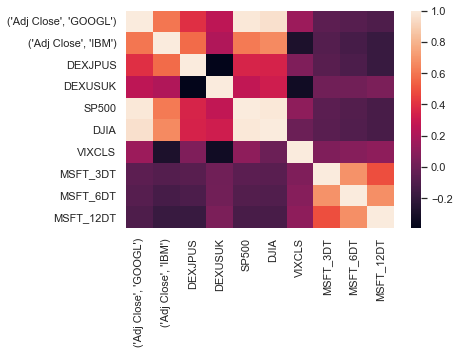

In [37]:
sns.heatmap(X.corr())

In [38]:
lower = pd.DataFrame(np.tril(X.corr(), -1), columns=X.corr().columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.602519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.393718,0.570449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.257608,0.213623,-0.391334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985398,0.609835,0.353037,0.269722,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.960221,0.661889,0.345500,0.315700,0.986199,0.000000,0.000000,0.000000,0.000000,0.0
6,0.150032,-0.285172,0.059257,-0.327534,0.104659,-0.010828,0.000000,0.000000,0.000000,0.0
7,-0.055436,-0.086262,-0.075528,0.007444,-0.062447,-0.065364,0.058112,0.000000,0.000000,0.0
8,-0.077440,-0.133476,-0.112719,0.015099,-0.089644,-0.093858,0.080604,0.685784,0.000000,0.0
9,-0.107763,-0.181218,-0.182845,0.044647,-0.126586,-0.129120,0.104789,0.488869,0.676832,0.0


<AxesSubplot:>

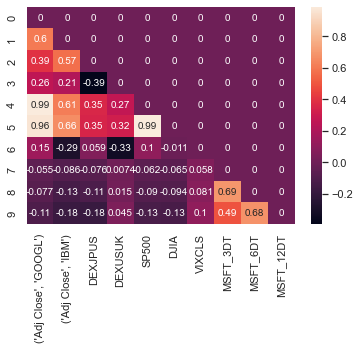

In [39]:
sns.heatmap(lower, annot=True)

In [40]:
to_drop = [column for column in lower if any(lower[column] > 0.9)]
to_drop

[('Adj Close', 'GOOGL'), 'SP500']

In [41]:
X.drop(to_drop, inplace=True, axis=1)
X

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_16962/3907518992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(to_drop, inplace=True, axis=1)


,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.510344,-0.028635,0.589904,-1.525879,-1.185618,0.028453,0.013731,0.114045
1,-0.462355,0.039003,0.530386,-1.528735,-1.190225,0.130415,0.064799,0.174997
2,-0.524947,0.117046,0.494676,-1.515053,-1.224782,0.053122,0.146752,0.155840
3,-0.524947,0.104039,0.552493,-1.505230,-1.261642,-0.007724,0.147938,0.168031
4,-0.565286,0.101437,0.496376,-1.499434,-1.266250,-0.038975,0.108742,0.108820
...,...,...,...,...,...,...,...,...
1224,1.301784,3.495018,-2.481215,0.777726,0.657401,-1.281191,-0.667496,-1.850362
1225,1.197510,3.489815,-2.488018,0.709686,0.618237,-1.510456,0.272883,-1.731752
1226,1.309166,3.651104,-2.668271,0.745106,0.582529,-0.476137,0.684932,-1.824416
1227,1.136607,3.664112,-2.598551,0.663106,0.572162,0.358666,-0.619463,-1.746579


In [42]:
Test_size = int(np.floor(0.3 * len(X)))
train_size = int(np.floor(0.7 * len(X)))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

## Model Training and Cross Validation

#### (a) Model Training and Cross Validation

In [43]:
#Set number of fold / Seed value
Num_fold = 3
Seed = 45

In [44]:
# Cross Validation Model
# set k-fold crossvalidation with shuffle
kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)

In [45]:
# Model selection
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

#### (b) Model Training and Cross Validation

In [46]:
# Calculate accuracy score for each model
score_LM = model_selection.cross_val_score(Model_LM, X_train, Y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, Y_train, cv=kfold)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2

In [47]:
# View score k-fold
# Valication score comparison
score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':score_poly})
score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()],'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})

In [48]:
score

,Linear Model,SVR_linear,SVR_rbf,SVR_poly
0,0.896505,0.886648,0.913576,0.866917
1,0.880911,0.868572,0.909505,0.879982
2,0.892554,0.886062,0.917920,0.858756


In [49]:
score_mean

,AVG Linear Model,AVG SVR_linear,AVG SVR_rbf,AVG SVC_poly
0,0.88999,0.880427,0.913667,0.868551


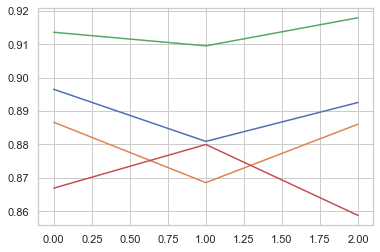

In [50]:
plt.plot(score)

## Model Evaluation

#### (a) Prediction and Evaluation

In [51]:
LM_pred = Model_LM.fit(X_train, Y_train).predict(X_test)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)
# SVR_Linear

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2

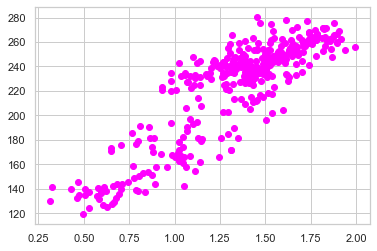

In [52]:
plt.scatter(X_test['DJIA'], LM_pred,c='magenta')

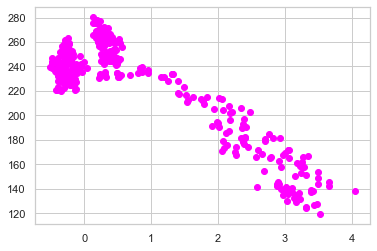

In [53]:
plt.scatter(X_test["DEXJPUS"], LM_pred,c='magenta')

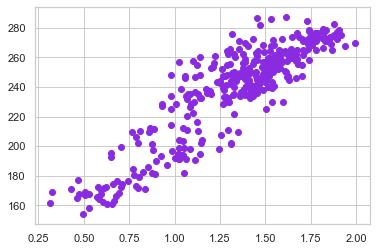

In [54]:
plt.scatter(X_test["DJIA"],SVR_Linear,c='blueviolet')

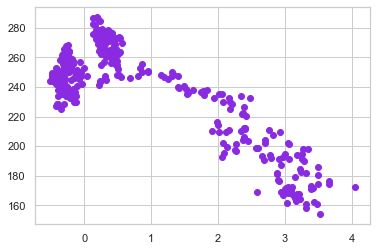

In [55]:
plt.scatter(X_test["DEXJPUS"],SVR_Linear,c='blueviolet')

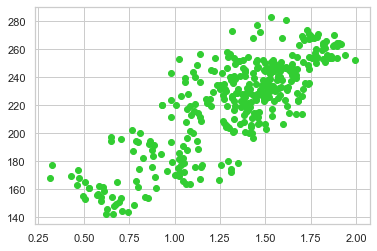

In [56]:
plt.scatter(X_test['DJIA'], SVR_Rbf,c='limegreen')

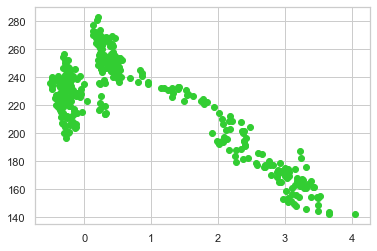

In [57]:
plt.scatter(X_test["DEXJPUS"], SVR_Rbf,c='limegreen')

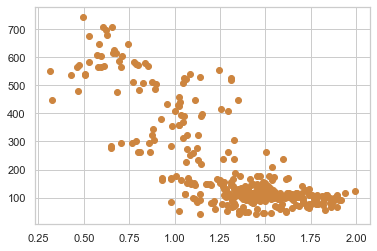

In [58]:
plt.scatter(X_test['DJIA'], SVR_Poly,c='peru')

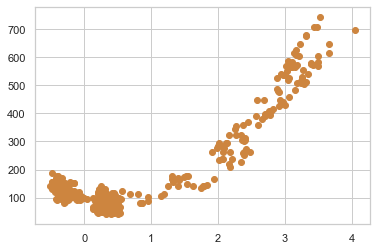

In [59]:
plt.scatter(X_test['DEXJPUS'], SVR_Poly,c='peru')

In [60]:
# Model prediction performance evaluation for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )
Lm_MSE = metrics.mean_squared_error(Y_test, LM_pred)
Lm_MSE

4701.742543323857

In [61]:
LM_r2 = metrics.r2_score(Y_test, LM_pred)
LM_r2

-5.298589215263093

In [62]:
SVR_linear_MSE = metrics.mean_squared_error(Y_test, SVR_Linear)
SVR_linear_MSE

2667.3438123948204

In [63]:
SVR_linear_r2 = metrics.r2_score(Y_test, SVR_Linear)
SVR_linear_r2

-2.573250303550603

In [64]:
SVR_Rbf_MSE = metrics.mean_squared_error(Y_test, SVR_Rbf)
SVR_Rbf_MSE

4423.24717007739

In [65]:
SVR_Rbf_r2 = metrics.r2_score(Y_test, SVR_Rbf)
SVR_Rbf_r2

-4.925508822564517

In [66]:
SVR_Poly_MSE = metrics.mean_squared_error(Y_test, SVR_Poly)
SVR_Poly_MSE

39886.11378718476

In [67]:
SVR_Poly_r2 = metrics.r2_score(Y_test, SVR_Poly)
SVR_Poly_r2

-52.432582457208774

In [68]:
mse = {
  Lm_MSE,
  SVR_linear_MSE,
  SVR_Rbf_MSE,
  SVR_Poly_MSE
}

r2 = {LM_r2,
  SVR_linear_r2,
  SVR_Rbf_r2,
  SVR_Poly_r2
}

In [69]:
mse = {Lm_MSE,SVR_linear_MSE,SVR_Rbf_MSE,SVR_Poly_MSE}
r2 = {LM_r2,SVR_linear_r2,SVR_Rbf_r2,SVR_Poly_r2}

print("mse: ", mse)
print("r2: ", r2)

mse:  {2667.3438123948204, 4701.742543323857, 39886.11378718476, 4423.24717007739}
r2:  {-5.298589215263093, -4.925508822564517, -2.573250303550603, -52.432582457208774}


<BarContainer object of 4 artists>

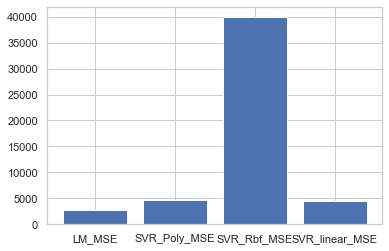

In [70]:
plt.bar(["LM_MSE","SVR_Poly_MSE","SVR_Rbf_MSE","SVR_linear_MSE"],mse)

<BarContainer object of 4 artists>

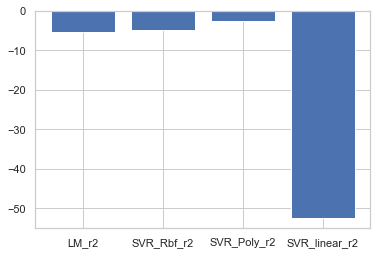

In [71]:
plt.bar(["LM_r2","SVR_Rbf_r2","SVR_Poly_r2","SVR_linear_r2"],r2)